In [192]:
import numpy as np
from scipy.special import erfc
from scipy.signal import convolve
import matplotlib.pyplot as plt

number_bits = 100
samples_per_bit = 10
sampling_indices = np.arange(1, number_bits + 1) * samples_per_bit - 1

N0 = 1
E = 1
A = 1

ber_simulated_with_matched_filter = []
ber_theortical_with_matched_filter = []

ber_simulated_with_delta_filter = []
ber_theortical_with_delta_filter = []

ber_simulated_with_ramp_filter = []
ber_theortical_with_ramp_filter = []

In [183]:
def generate_data():
    return np.random.choice([0, 1], size=number_bits)

def generate_pulse(data=None):
    if data is None:
        data = generate_data()
    data = np.where(data == 0, -1, data)
    pulse_stream = np.repeat(data, samples_per_bit)
    single_pulse = np.linalg.norm(A * np.ones(samples_per_bit), axis=0)
    return pulse_stream / single_pulse

def generate_noise(N0=N0):
    segma = np.sqrt(N0 / 2)
    return np.random.normal(loc=0, scale=segma, size=(number_bits * samples_per_bit))

def generate_filter(type):
    base = np.zeros(number_bits * samples_per_bit)
    if type == "ramp":
        base[:samples_per_bit] = np.sqrt(3) * np.arange(0, samples_per_bit, dtype=np.float64)
    elif type == "delta":
        base[0] = A
    elif type == "matched":
        base[:samples_per_bit] = A
    return base

def transmit_over_channel(signal, noise):
    return signal + noise

def filter_receive(signal, filter_type):
    filter = generate_filter(filter_type)
    return convolve(signal, filter)

def sample_signal(signal):
    return (signal[sampling_indices] > 0).astype(int)

def calculate_theoretical_ber(N0, filter_type):
    if filter_type == "ramp":
        return 0.5 * erfc(A * np.sqrt((3 * samples_per_bit) / (4 * N0)))
    elif filter_type == "delta":
        return 0.5 * erfc(A * np.sqrt(1 / N0))
    elif filter_type == "matched":
        return 0.5 * erfc(A * np.sqrt(samples_per_bit / N0))
    return 0

def calculate_simulated_ber(bits, received_sampled_bits):
    errors = np.sum(bits != received_sampled_bits)
    return errors / bits.shape[0]

def plot_signal(title, signal, trim=True):
    if trim:
        signal = signal[:np.argmax(signal[::-1] != 0)]
    plt.figure(figsize=(15, 5))
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)
    plt.show()

def plot_error():
    plt.figure(figsize=(15, 10))
    plt.title('BER - Bit Error Rate Vs E/N0')

    plt.plot(range(-10, 21), ber_simulated_with_matched_filter, 'r', label="BER Simulation with Matched Filter")
    plt.plot(range(-10, 21), ber_theortical_with_matched_filter, 'o-r', label="BER Theoretical with Matched Filter")

    plt.plot(range(-10, 21), ber_simulated_with_delta_filter, 'g',  label="BER Simulation with delta Filter")
    plt.plot(range(-10, 21), ber_theortical_with_delta_filter, 'o-g', label="BER Theoretical with delta Filter")

    plt.plot(range(-10, 21), ber_simulated_with_ramp_filter, 'b',  label="BER Simulation with Ramp Filter")
    plt.plot(range(-10, 21), ber_theortical_with_ramp_filter, 'o-b', label="BER Theoretical with Ramp Filter")

    plt.xlabel('E/N0 (dB)')
    plt.ylabel('Bit Error Rate')
    plt.yscale('log')
    plt.ylim(10**(-5), 10)
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
signal_transmitted = transmit_over_channel(generate_pulse(), generate_noise())
signal_with_matched_filter = filter_receive(signal_transmitted, "matched")
signal_with_delta_filter = filter_receive(signal_transmitted, "delta")
signal_with_ramp_filter = filter_receive(signal_transmitted, "ramp")
signal_with_matched_filter_sampled = sample_signal(signal_with_matched_filter)
signal_with_delta_filter_sampled = sample_signal(signal_with_delta_filter)
signal_with_ramp_filter_sampled = sample_signal(signal_with_ramp_filter)

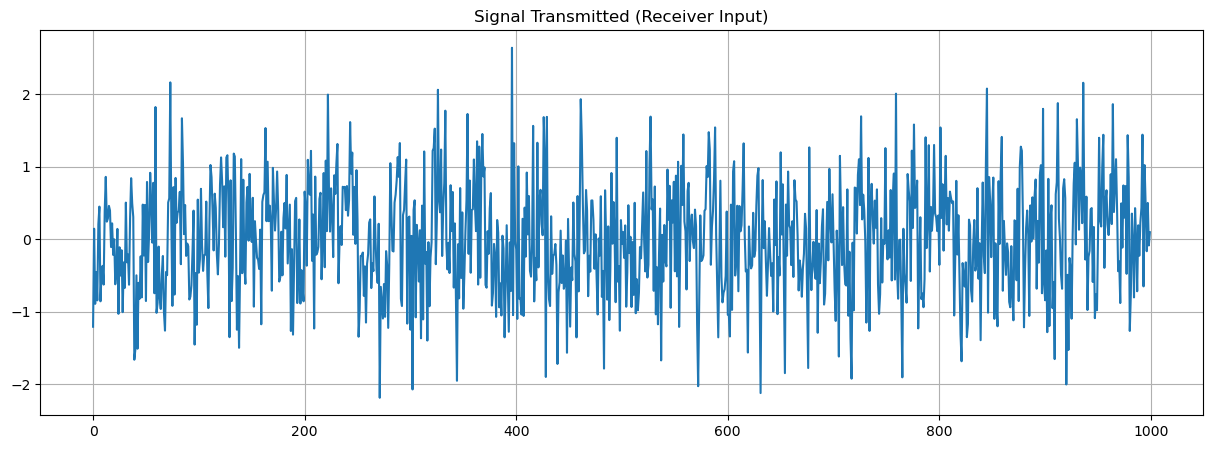

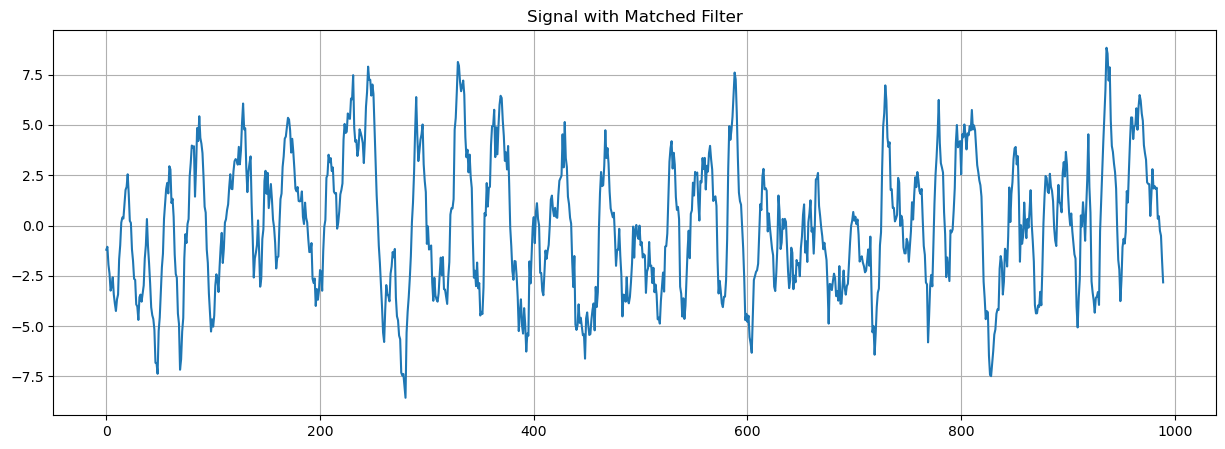

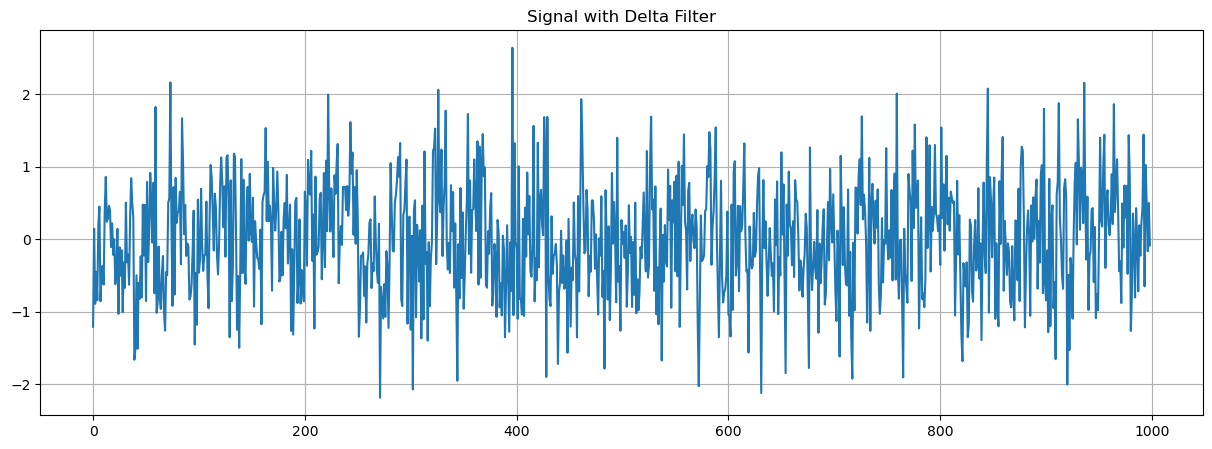

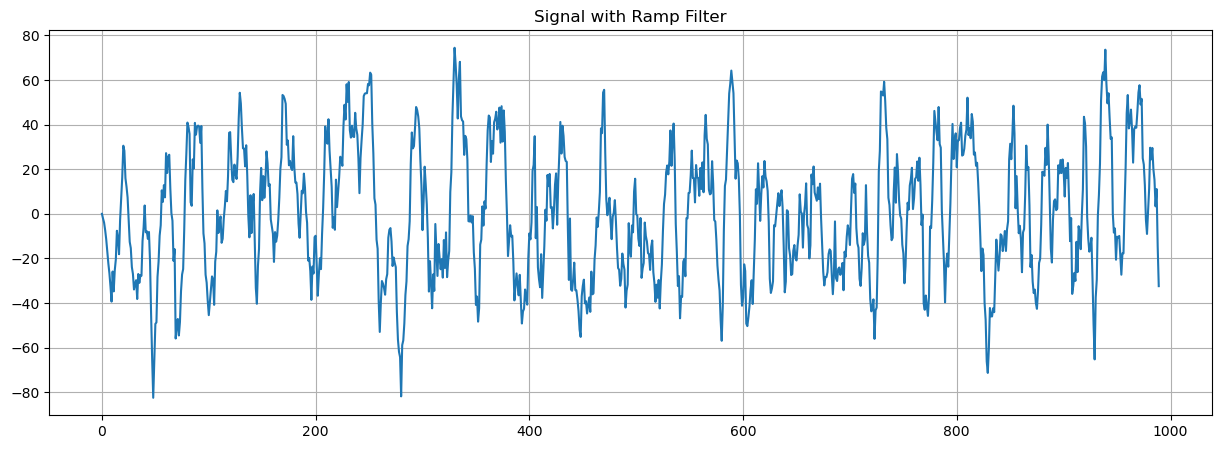

In [169]:
plot_signal("Signal Transmitted (Receiver Input)", signal_transmitted, trim=False)
plot_signal("Signal with Matched Filter", signal_with_matched_filter)
plot_signal("Signal with Delta Filter", signal_with_delta_filter)
plot_signal("Signal with Ramp Filter", signal_with_ramp_filter)

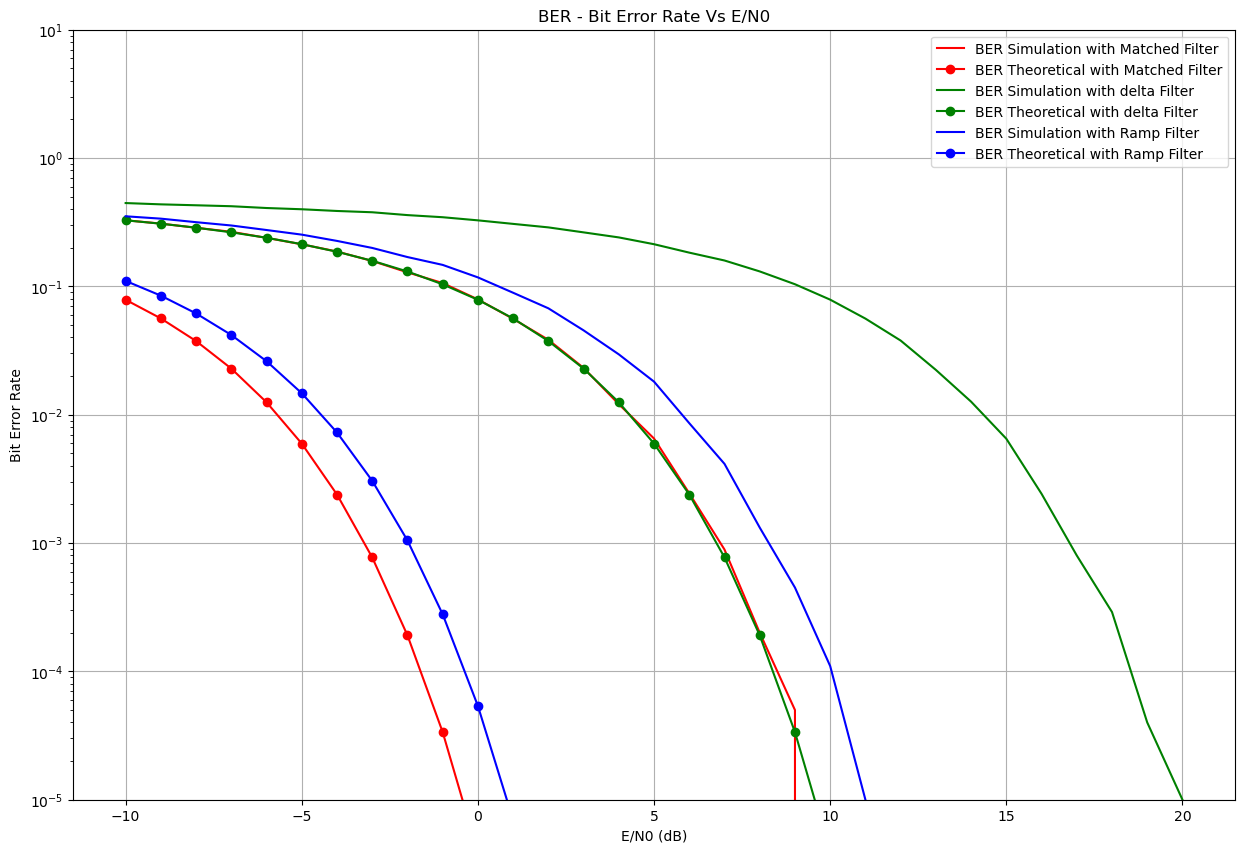

In [195]:
number_bits = 100000
sampling_indices = np.arange(1, number_bits + 1) * samples_per_bit - 1
data = generate_data()
signal = generate_pulse(data)

ber_simulated_with_matched_filter = []
ber_theortical_with_matched_filter = []

ber_simulated_with_delta_filter = []
ber_theortical_with_delta_filter = []

ber_simulated_with_ramp_filter = []
ber_theortical_with_ramp_filter = []

for EN0 in range(-10, 21): 
    EN0 = 10 ** (EN0/10)
    N0 = E / EN0
    
    signal_transmitted = transmit_over_channel(signal, generate_noise(N0))
    signal_with_matched_filter = filter_receive(signal_transmitted, "matched")
    signal_with_delta_filter = filter_receive(signal_transmitted, "delta")
    signal_with_ramp_filter = filter_receive(signal_transmitted, "ramp")
    signal_with_matched_filter_sampled = sample_signal(signal_with_matched_filter)
    signal_with_delta_filter_sampled = sample_signal(signal_with_delta_filter)
    signal_with_ramp_filter_sampled = sample_signal(signal_with_ramp_filter)

    ber_simulated_with_matched_filter.append(calculate_simulated_ber(data, signal_with_matched_filter_sampled))
    ber_theortical_with_matched_filter.append(calculate_theoretical_ber(N0, "matched"))
    
    ber_simulated_with_delta_filter.append(calculate_simulated_ber(data, signal_with_delta_filter_sampled))
    ber_theortical_with_delta_filter.append(calculate_theoretical_ber(N0, "delta"))
    
    ber_simulated_with_ramp_filter.append(calculate_simulated_ber(data, signal_with_ramp_filter_sampled))
    ber_theortical_with_ramp_filter.append(calculate_theoretical_ber(N0, "ramp"))

plot_error()